In [13]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
Target_Users = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']
sentiment_dict = {}
for user in Target_Users:
    # Target User Account
    target_user = user

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
    
    # create keys
    key_compound = user + '_compound'
    key_positive = user + '_positive'
    key_negative = user + '_negative'
    key_neutral = user + '_neutral'
    
    # store list in dictionary
    sentiment_dict[key_compound] = compound_list
    sentiment_dict[key_positive] = positive_list
    sentiment_dict[key_negative] = negative_list
    sentiment_dict[key_neutral] = neutral_list

In [11]:
# store dict in data frame
Sentiment_DF = pd.DataFrame(sentiment_dict)
Sentiment_DF.reset_index(inplace=True)

# define order of tweets
Sentiment_DF['index'] = Sentiment_DF['index'].apply(lambda x: (x) * -1)
Sentiment_DF = Sentiment_DF.rename(columns={'index': 'Tweet_order'})
Sentiment_DF.head()

,Tweet_order,@BBC_compound,@BBC_positive,@BBC_negative,@BBC_neutral,@CBS_compound,@CBS_positive,@CBS_negative,@CBS_neutral,@CNN_compound,...,@CNN_negative,@CNN_neutral,@FoxNews_compound,@FoxNews_positive,@FoxNews_negative,@FoxNews_neutral,@nytimes_compound,@nytimes_positive,@nytimes_negative,@nytimes_neutral
0,0,0.1967,0.095,0.000,0.905,0.5562,0.174,0.000,0.826,0.0000,...,0.000,1.000,0.6124,0.227,0.000,0.773,-0.7650,0.000,0.280,0.720
1,-1,0.0000,0.000,0.000,1.000,0.5411,0.143,0.000,0.857,0.0000,...,0.000,1.000,-0.8910,0.000,0.492,0.508,0.0000,0.000,0.000,1.000
2,-2,-0.1027,0.000,0.065,0.935,0.0000,0.000,0.000,1.000,-0.1280,...,0.118,0.786,-0.8020,0.000,0.286,0.714,-0.3506,0.060,0.177,0.764
3,-3,0.3612,0.122,0.000,0.878,-0.3818,0.000,0.106,0.894,-0.5267,...,0.175,0.825,0.0000,0.000,0.000,1.000,0.9118,0.426,0.000,0.574
4,-4,-0.2960,0.000,0.306,0.694,0.3182,0.103,0.000,0.897,-0.1280,...,0.170,0.638,0.0772,0.064,0.000,0.936,-0.3612,0.000,0.238,0.762


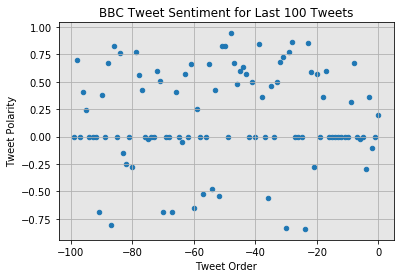

In [59]:
ax1 = plt.subplot()
Sentiment_DF.plot(x='Tweet_order', y='@BBC_compound', kind='scatter', ax=ax1)
ax1.set_xlabel('Tweet Order')
ax1.set_ylabel('Tweet Polarity')
ax1.set_title('BBC Tweet Sentiment for Last 100 Tweets')
ax1.grid()
ax1.set_facecolor('0.9')
plt.savefig('BBC_Sentiment.png')
plt.show()

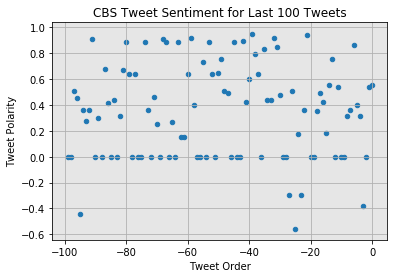

In [60]:
ax1 = plt.subplot()
Sentiment_DF.plot(x='Tweet_order', y='@CBS_compound', kind='scatter', ax=ax1)
ax1.set_xlabel('Tweet Order')
ax1.set_ylabel('Tweet Polarity')
ax1.set_title('CBS Tweet Sentiment for Last 100 Tweets')
ax1.grid()
ax1.set_facecolor('0.9')
plt.savefig('CBS_Sentiment.png')
plt.show()

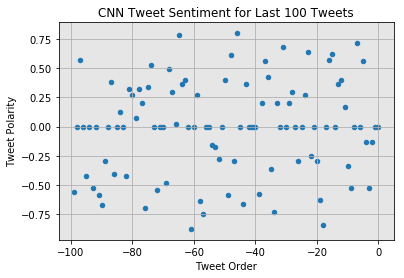

In [61]:
ax1 = plt.subplot()
Sentiment_DF.plot(x='Tweet_order', y='@CNN_compound', kind='scatter', ax=ax1)
ax1.set_xlabel('Tweet Order')
ax1.set_ylabel('Tweet Polarity')
ax1.set_title('CNN Tweet Sentiment for Last 100 Tweets')
ax1.grid()
ax1.set_facecolor('0.9')
plt.savefig('CNN_Sentiment.png')
plt.show()

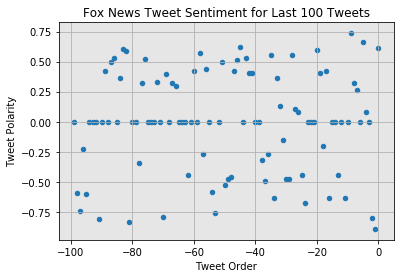

In [62]:
ax1 = plt.subplot()
Sentiment_DF.plot(x='Tweet_order', y='@FoxNews_compound', kind='scatter', ax=ax1)
ax1.set_xlabel('Tweet Order')
ax1.set_ylabel('Tweet Polarity')
ax1.set_title('Fox News Tweet Sentiment for Last 100 Tweets')
ax1.grid()
ax1.set_facecolor('0.9')
plt.savefig('FoxNews_Sentiment.png')
plt.show()

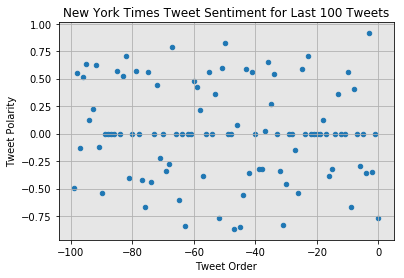

In [63]:
ax1 = plt.subplot()
Sentiment_DF.plot(x='Tweet_order', y='@nytimes_compound', kind='scatter', ax=ax1)
ax1.set_xlabel('Tweet Order')
ax1.set_ylabel('Tweet Polarity')
ax1.set_title('New York Times Tweet Sentiment for Last 100 Tweets')
ax1.grid()
ax1.set_facecolor('0.9')
plt.savefig('NYT_Sentiment.png')
plt.show()

In [35]:
avg_sentiment = Sentiment_DF.mean()
avg_sentiment = avg_sentiment.filter(regex='compound$')
avg_sentiment

@BBC_compound        0.168053
@CBS_compound        0.355199
@CNN_compound       -0.008016
@FoxNews_compound   -0.001384
@nytimes_compound    0.012831
dtype: float64

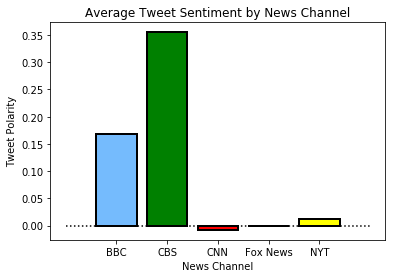

In [64]:
plt.hlines(0, -1, 5, linestyles='dotted')
ticks = ['BBC', 'CBS','CNN', 'Fox News', 'NYT']
plt.bar(x=ticks, height=avg_sentiment, color=['xkcd:sky blue', 'green', 'red', 'blue', 'yellow'], edgecolor='k', linewidth=2)
plt.xlabel('News Channel')
plt.ylabel('Tweet Polarity')
plt.title('Average Tweet Sentiment by News Channel')
plt.savefig('Avg_News_Sentiment.png')
plt.show()

In [56]:
Sentiment_Compound_DF = Sentiment_DF.filter(regex='compound$', axis=1)
Sentiment_Compound_DF.head()

,@BBC_compound,@CBS_compound,@CNN_compound,@FoxNews_compound,@nytimes_compound
0,0.1967,0.5562,0.0000,0.6124,-0.7650
1,0.0000,0.5411,0.0000,-0.8910,0.0000
2,-0.1027,0.0000,-0.1280,-0.8020,-0.3506
3,0.3612,-0.3818,-0.5267,0.0000,0.9118
4,-0.2960,0.3182,-0.1280,0.0772,-0.3612


In [57]:
Sentiment_Compound_DF.to_csv('Sentiment_Compound.csv')